In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
np.random.seed(2004)
%matplotlib inline
import pandas_datareader as dr
from datetime import date, datetime, timedelta
plt.style.use("ggplot")

In [19]:
# Utilizando random para genera números aleatorios.
import random
random.seed(2004) # semilla para replicar la aleatoriedad
random.random() # primer llamado a random

0.5245455205825139

In [20]:
random.random() # segundo llamado a random

0.7896403640668775

In [21]:
for i in range(6):
    print(random.random()) # 5 números aleatorios

0.20631422804188693
0.37030852663826075
0.6676957817702263
0.6110784003600596
0.6015477564523376
0.9049212593043362


In [22]:
# volviendo a llamar a seed para replicar el mismo resultado aleatorio.
random.seed(1984)
for i in range(7):
    print(random.random()) # Mismos resultados que arriba.

0.36352835585530807
0.49420568181919666
0.33961008717180197
0.21648780903913534
0.8626522767441037
0.8493329421213219
0.38578540884489343


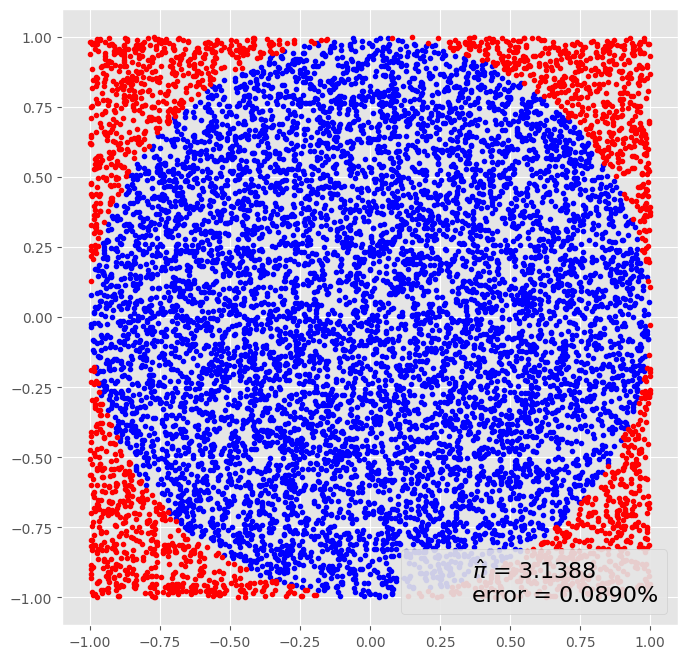

In [23]:
# Ejemplo: Aproximando el valor de pi - área de un círculo de
# radio = 1.
#ENCUENTRA UNA APROXIMACIÓN A PI
def mc_pi_aprox(N=10000):
    plt.figure(figsize=(8,8))  # tamaño de la figura
    x, y = np.random.uniform(-1, 1, size=(2, N))
    interior = (x**2 + y**2) <= 1
    pi = interior.sum() * 4 / N
    error = abs((pi - np.pi) / pi) * 100
    exterior = np.invert(interior)
    plt.plot(x[interior], y[interior], 'b.')
    plt.plot(x[exterior], y[exterior], 'r.')
    plt.plot(0, 0, label='$\hat \pi$ = {:4.4f}\nerror = {:4.4f}%'
             .format(pi,error), alpha=0)
    plt.axis('square')
    plt.legend(frameon=True, framealpha=0.9, fontsize=16)

mc_pi_aprox()

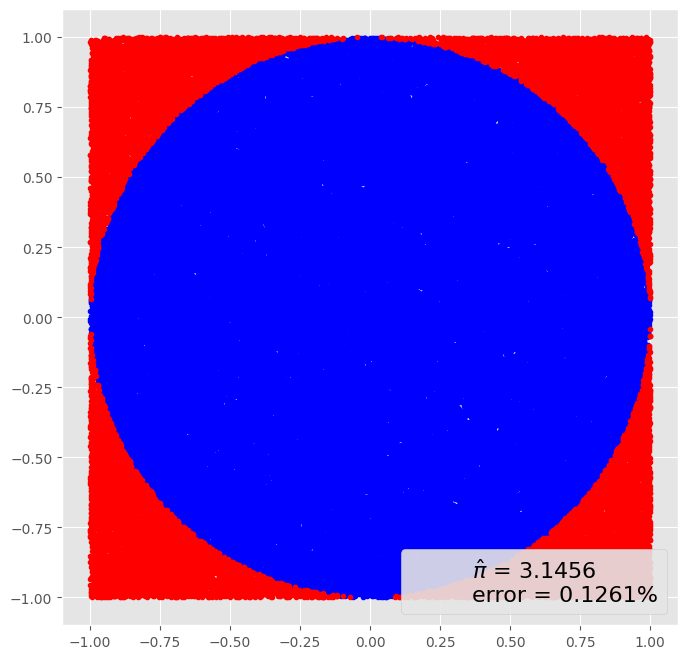

In [24]:
# con 1000000 experimentos
mc_pi_aprox(N=100000)

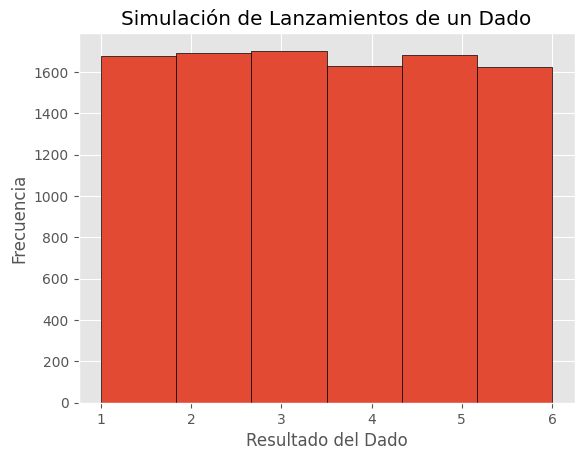

In [25]:
# Simulación de lanzamiento de un dado 10,000 veces
resultados = np.random.randint(1, 7, 10000)

# Visualización de resultados
plt.hist(resultados, bins=6, edgecolor='black')
plt.title('Simulación de Lanzamientos de un Dado')
plt.xlabel('Resultado del Dado')
plt.ylabel('Frecuencia')
plt.show()

In [26]:
data = yf.download('AAPL', start='2020-01-01', end='2023-01-01')
print(data.head())  # Para verificar los primeros datos descargados
precios = data['Adj Close'].values
print(precios)  # Verificar si la serie de precios no está vacía

[*********************100%***********************]  1 of 1 completed

Price                      Adj Close      Close       High        Low  \
Ticker                          AAPL       AAPL       AAPL       AAPL   
Date                                                                    
2020-01-02 00:00:00+00:00  72.796028  75.087502  75.150002  73.797501   
2020-01-03 00:00:00+00:00  72.088295  74.357498  75.144997  74.125000   
2020-01-06 00:00:00+00:00  72.662697  74.949997  74.989998  73.187500   
2020-01-07 00:00:00+00:00  72.320984  74.597504  75.224998  74.370003   
2020-01-08 00:00:00+00:00  73.484352  75.797501  76.110001  74.290001   

Price                           Open     Volume  
Ticker                          AAPL       AAPL  
Date                                             
2020-01-02 00:00:00+00:00  74.059998  135480400  
2020-01-03 00:00:00+00:00  74.287498  146322800  
2020-01-06 00:00:00+00:00  73.447502  118387200  
2020-01-07 00:00:00+00:00  74.959999  108872000  
2020-01-08 00:00:00+00:00  74.290001  132079200  
[[ 72.79602814]

In [27]:
precios = precios[~np.isnan(precios)]  # Filtrar valores NaN

In [28]:
if len(precios) > 1:
    S0 = precios[-1]
    log_returns = np.diff(np.log(precios))
    mu = np.mean(log_returns)  # Rentabilidad media
    sigma = np.std(log_returns)  # Volatilidad
else:
    print("No hay suficientes datos para realizar las simulaciones.")